<a href="https://colab.research.google.com/github/harshdarji23/YaayBnb/blob/master/EDA/Airbnb/Airbnb-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# package imports
#basics
import numpy as np
import pandas as pd

#viz
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 


#settings

color = sns.color_palette()
sns.set_style("dark")
pd.set_option('display.max_columns', None)

%matplotlib inline

From a local drive

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Airbnb_cleaned.csv to Airbnb_cleaned.csv


In [0]:
airbnb=pd.read_csv('Airbnb_cleaned.csv',index_col=False)

In [0]:
# Data Exploration

In [0]:
airbnb.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
airbnb.head(2)

,id,host_id,borough,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,description,accommodates,zipcode
0,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,10,48,0.39,1,1,"Beautiful, spacious skylit studio in the heart...",1,10018.0
1,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,295,4.67,1,1,Urban retreat: enjoy 500 s.f. floor in 1899 br...,3,11238.0


In [0]:
# NYC is an expensive city so let's check average price of a room here: 
# From below we see the average price of a room in NYC is $158

In [8]:
airbnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,49111.0,2.112801e+07,1.238695e+07,2595.00000,9.976903e+06,2.126633e+07,3.239956e+07,4.058402e+07
host_id,49111.0,7.784668e+07,9.043023e+07,2438.00000,8.700905e+06,3.484102e+07,1.268974e+08,3.143682e+08
latitude,49111.0,4.072880e+01,5.484581e-02,40.49979,4.068965e+01,4.072293e+01,4.076300e+01,4.091686e+01
longitude,49111.0,-7.395104e+01,4.728028e-02,-74.24787,-7.398291e+01,-7.395517e+01,-7.393466e+01,-7.371299e+01
price,49111.0,1.587713e+02,3.518567e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,49111.0,7.578648e+00,2.254571e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,49111.0,2.526346e+01,4.776681e+01,0.00000,1.000000e+00,6.000000e+00,2.600000e+01,6.750000e+02
reviews_per_month,49111.0,1.130645e+00,1.622946e+00,0.00000,4.000000e-02,3.800000e-01,1.670000e+00,5.263000e+01
calculated_host_listings_count,49111.0,7.481338e+00,3.322901e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.100000e+02
availability_365,49111.0,1.126817e+02,1.358786e+02,0.00000,0.000000e+00,4.100000e+01,2.260000e+02,3.650000e+02


In [0]:
# let's check correlation
# Most of the attributes are not correlated , but there's some correlation between num of reviews and reviews per month

In [10]:
airbnb.corr().style.background_gradient(cmap='RdPu')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,accommodates,zipcode
id,1,0.602643,-0.00611705,0.102281,0.0341183,0.000998199,-0.309328,0.20039,0.121005,0.13803,0.0614492,-0.00779787
host_id,0.602643,1,0.0226094,0.135427,0.0507459,0.00956841,-0.139523,0.215493,0.114935,0.236633,0.0791536,-0.00342641
latitude,-0.00611705,0.0226094,1,0.0777251,0.0293763,0.0278138,-0.0173575,-0.026178,0.0247718,-0.00603125,-0.0428109,-0.00124124
longitude,0.102281,0.135427,0.0777251,1,-0.112189,-0.0551442,0.0622351,0.155932,-0.110864,0.0797925,-0.00434628,0.00154635
price,0.0341183,0.0507459,0.0293763,-0.112189,1,0.0275626,-0.0426868,-0.0425652,0.0239565,0.0651477,0.227428,-0.00169721
minimum_nights,0.000998199,0.00956841,0.0278138,-0.0551442,0.0275626,1,-0.0889456,-0.13436,0.122589,0.151144,-0.0229331,-0.00180375
number_of_reviews,-0.309328,-0.139523,-0.0173575,0.0622351,-0.0426868,-0.0889456,1,0.596896,-0.0768778,0.120223,0.0691192,0.00389517
reviews_per_month,0.20039,0.215493,-0.026178,0.155932,-0.0425652,-0.13436,0.596896,1,-0.0759808,0.153844,0.12066,0.00141147
calculated_host_listings_count,0.121005,0.114935,0.0247718,-0.110864,0.0239565,0.122589,-0.0768778,-0.0759808,1,0.227539,0.00480892,-0.000898764
availability_365,0.13803,0.236633,-0.00603125,0.0797925,0.0651477,0.151144,0.120223,0.153844,0.227539,1,0.142734,-0.00399711


In [0]:
# Manhattan is called heart of NYC so let's explore this neighborhood

Text(0.5, 1.0, 'Share of New York')

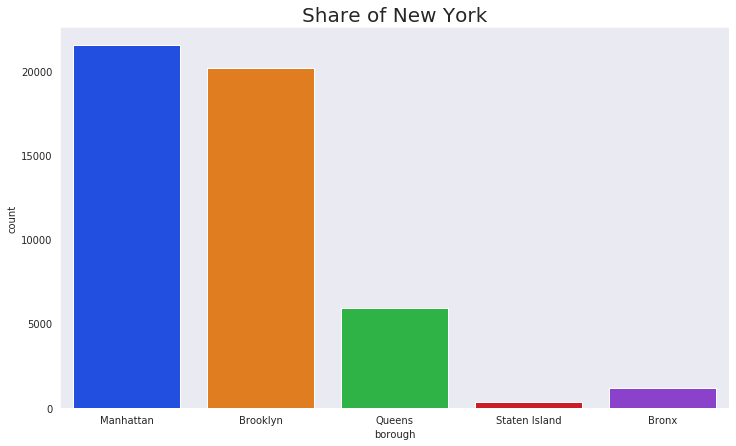

In [12]:
sns.countplot(airbnb['borough'], palette="bright")#hue=airbnb['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(12,7)
plt.title('Share of New York',fontsize=20)


In [0]:
# clearly, Manhattan and Brooklyn have more rentals, now let's visualize them on a map

In [0]:
import sys
#sys.setrecursionlimit(10000)
#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
#import geopandas as gpd
#from branca.colormap import LinearColormap

In [14]:
lats =airbnb['latitude'].tolist()
lons = airbnb['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[40.7128,-74.0060], zoom_start=11)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [0]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [16]:

from folium.plugins import HeatMap
df_copy = airbnb[['latitude','longitude']].copy()
df_copy['count'] = 1
base_map = generateBaseMap()
HeatMap(data=df_copy[['latitude', 'longitude', 'count']].values.tolist(), radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'yellow',1.0:'red'}, max_zoom=11).add_to(base_map)
base_map


In [0]:
# of course Manhattan has a lot of listings but it's expensive as well, let's check pricing for each neighborhood

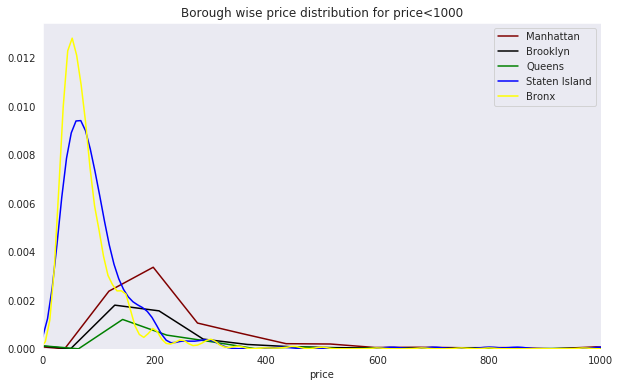

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(airbnb[airbnb.borough=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(airbnb[airbnb.borough=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(airbnb[airbnb.borough=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(airbnb[airbnb.borough=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(airbnb[airbnb.borough=='Bronx'].price,color='yellow',hist=False,label='Bronx')
plt.title('Borough wise price distribution for price<1000')
plt.xlim(0,1000)
plt.show()

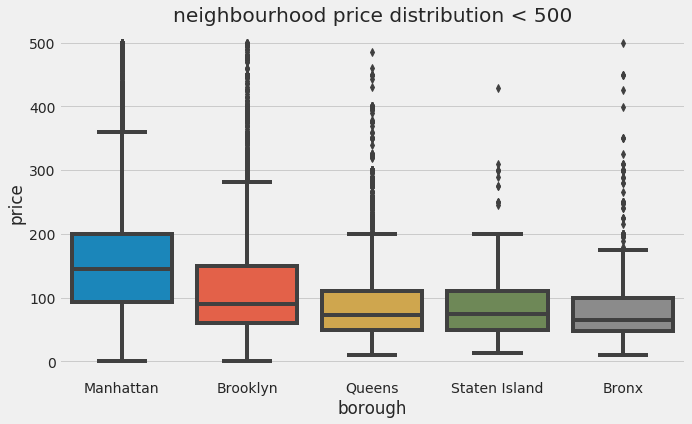

In [20]:
plt.style.use('fivethirtyeight')
ng = airbnb[airbnb.price <500]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='borough' ,data = ng)
plt.title("neighbourhood price distribution < 500")
plt.show()

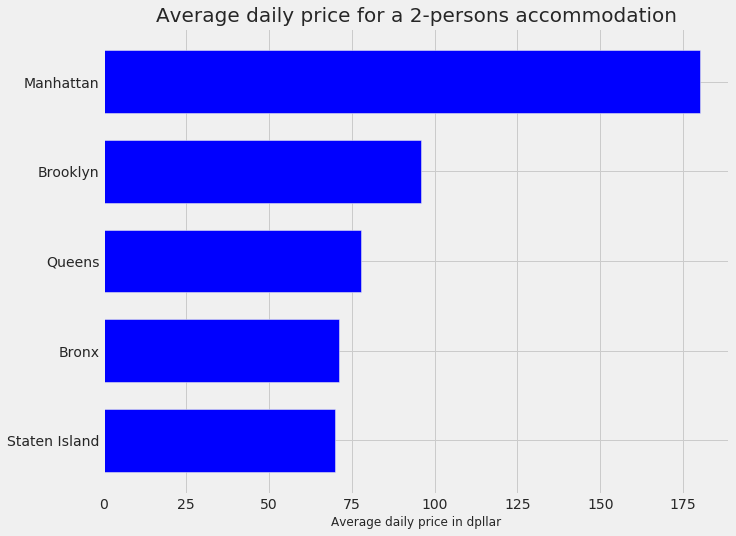

In [24]:
feq = airbnb[airbnb['accommodates']==2]
feq = feq.groupby('borough')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='b', width=0.7)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price in dpllar', fontsize=12)
plt.ylabel("")
plt.show()

In [0]:
#pip install geopandas

In [0]:
#pip install https://github.com/pyinstaller/pyinstaller/archive/develop.zip

In [0]:
#import geopandas as gpd
#from branca.colormap import LinearColormap

In [0]:
#import json

In [29]:
''' Not working--working on kaggle kernel
feq1 = airbnb[airbnb['accommodates']==2]
feq1 = feq1.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=True)
feq1.index.names=['neighbourhood']
feq1
adam = gpd.read_file("neighbourhoods.geojson")
feq1 = pd.DataFrame([feq1])
feq1 = feq1.transpose()
adam = pd.merge(adam, feq1, on='neighbourhood', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)
map_dict = adam.set_index('neighbourhood')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood'])
    return color_scale(value)

map3 = folium.Map(location=[40.693943, -73.985880], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3
'''

' Not working--working on kaggle kernel\nfeq1 = airbnb[airbnb[\'accommodates\']==2]\nfeq1 = feq1.groupby(\'neighbourhood_group\')[\'price\'].mean().sort_values(ascending=True)\nfeq1.index.names=[\'neighbourhood\']\nfeq1\nadam = gpd.read_file("neighbourhoods.geojson")\nfeq1 = pd.DataFrame([feq1])\nfeq1 = feq1.transpose()\nadam = pd.merge(adam, feq1, on=\'neighbourhood\', how=\'left\')\nadam.rename(columns={\'price\': \'average_price\'}, inplace=True)\nadam.average_price = adam.average_price.round(decimals=0)\nmap_dict = adam.set_index(\'neighbourhood\')[\'average_price\'].to_dict()\ncolor_scale = LinearColormap([\'yellow\',\'red\'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))\n\ndef get_color(feature):\n    value = map_dict.get(feature[\'properties\'][\'neighbourhood\'])\n    return color_scale(value)\n\nmap3 = folium.Map(location=[40.693943, -73.985880], zoom_start=11)\nfolium.GeoJson(data=adam,\n               name=\'New York\',\n               tooltip=folium.feature

In [0]:
# we have neighborhoods inside neighborhood group, let's explore them

In [0]:
airbnb.neighbourhood.value_counts()

Bedford-Stuyvesant            3904
Williamsburg                  3879
Harlem                        2700
Bushwick                      2449
Hell's Kitchen                2001
Upper West Side               1958
East Village                  1857
Upper East Side               1769
Crown Heights                 1600
Midtown                       1502
Chelsea                       1141
East Harlem                   1136
Greenpoint                    1095
Lower East Side                932
Washington Heights             927
Astoria                        917
West Village                   765
Financial District             729
Flatbush                       623
Clinton Hill                   576
Long Island City               546
Prospect-Lefferts Gardens      529
East Flatbush                  509
Murray Hill                    505
Park Slope                     501
Flushing                       491
Fort Greene                    477
Kips Bay                       442
Ridgewood           